# Manufacturing Root Cause (Group 3)

Importing all necessary libraries and loading the data

In [2]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url_defects = 'https://dl.dropboxusercontent.com/scl/fi/j3xred1cqmicuxui4kj6m/RC_DEFECTS_clean.csv?rlkey=gumwpqnsfvdyjdx5doi4i7zxb&dl=1'
url_production = 'https://dl.dropboxusercontent.com/scl/fi/baekmodofe2sn64qhrcur/RC_PRODUCTION_clean.csv?rlkey=uw7r9vgblez57cbnwsf2c3vmd&dl=1'
df_def = pd.read_csv(url_defects)
df_prod = pd.read_csv(url_production)

Show the head of the dataframes

In [25]:
print(df_def.shape)
df_def.head()

(617, 10)


,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0.0,599.0,2019-03-01,0,0,1,0,0,0
1,389523,600.0,1457.0,2019-03-01,0,1,1,0,0,0
2,389528,0.0,1399.0,2019-03-01,0,0,1,0,0,0
3,389528,1400.0,1539.0,2019-03-01,0,0,1,0,1,0
4,389712,0.0,1374.0,2019-03-01,0,0,1,0,0,0


In [24]:
print(df_prod.shape)
df_prod.head()

(299384, 110)


,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Columns of production dataframe
prod_columns = list(df_prod.columns)
print(prod_columns) # around 110 features!

# Possible question: How do we reduce dimensionality? PCA? 

['COIL', 'DATE', 'MT', 'TIME_START_PROCESS', 'SPEED_PROCESS', 'TEMP_Z1', 'TEMP_Z2', 'TEMP_Z3', 'TEMP_Z4', 'TEMP_Z5', 'TEMP_Z6', 'PYRO_1_PRECHMBR', 'PYRO_2_FRST_3_ZONE', 'PYRO_3_LST_3_ZONE', 'LS_OVEN', 'LASER_FRN_1', 'LASER_FRN_2', 'LASER_FRN_3', 'LASER_FRN_4', 'LASER_FRN_5', 'LASER_FRN_6', 'LASER_FRN_7', 'LASER_FRN_8', 'LASER_FRN_9', 'AIR_CH4_1', 'AIR_CH4_2', 'AIR_CH4_3', 'AIR_CH4_4', 'AIR_CH4_5', 'AIR_CH4_6', 'AIR_Z1_1', 'AIR_Z1_2', 'AIR_Z2_1', 'AIR_Z2_2', 'AIR_Z3_1', 'AIR_Z3_2', 'AIR_Z4_1', 'AIR_Z4_2', 'AIR_Z5_1', 'AIR_Z5_2', 'AIR_Z6_1', 'AIR_Z6_2', 'GAS_Z1_1', 'GAS_Z1_2', 'GAS_Z2_1', 'GAS_Z2_2', 'GAS_Z3_1', 'GAS_Z3_2', 'GAS_Z4_1', 'GAS_Z4_2', 'GAS_Z5_1', 'GAS_Z5_2', 'GAS_Z6_1', 'GAS_Z6_2', 'FRN_PHF_PRESSURE', 'FRN_FURNACE_PRESSURE', 'TIRO_FORNO', 'PRES_ZONA1_MEASURED', 'PRES_ZONA1_SET', 'PRES_ZONA2_MEASURED', 'PRES_ZONA2_SET', 'PRES_ZONA3_MEASURED', 'PRES_ZONA3_SET', 'EXT_1', 'EXT_2', 'VENT_1', 'VENT_2', 'VENT_3', 'VENT_4', 'VENT_5', 'COOL_1A', 'COOL_1B', 'COOL_2A', 'COOL_2B', 'COOL

Merging the two dataframes

In [28]:
# Merging the datasets on 'COIL' and 'DATE'
merged_data = pd.merge(df_prod, df_def, on=['COIL', 'DATE'])

# Quick look at the data
print(merged_data.shape)

(131179, 118)


In [29]:
# Checking for missing values
missing_values = merged_data.isna().sum()
print(missing_values)

COIL                  0
DATE                  0
MT                    0
TIME_START_PROCESS    0
SPEED_PROCESS         0
                     ..
DIF_TIPO_2            0
DIF_TIPO_3            0
DIF_TIPO_4            0
DIF_TIPO_5            0
DIF_TIPO_6            0
Length: 118, dtype: int64


Visualize missing values with a bar chart

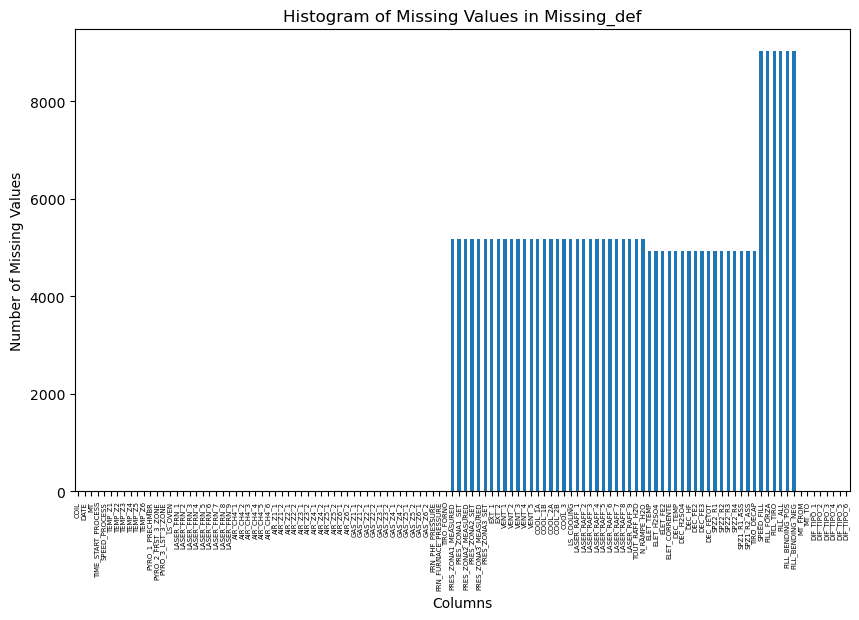

In [30]:
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values in Missing_def')
plt.xticks(rotation=90, fontsize = 5)
plt.show()
# Possible question: "Should we get rid of those null values?"